<center> <h2> Data Storytelling </h2> </center>

## Desafío entregable
### Comisión 32845
* **Tutor:** Anahí García
* **Alumno:** Carlos Alarcón Villegas

**Liberías importadas**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


## Predicción de un derrame cerebral

Un **derrame cerebral** ocurre cuando se interrumpe el flujo sanguíneo al cerebro. Pocos minutos después, que se produce un derrame cerebral, las **células del cerebro comienzan a morir** lo que puede causar daños a largo plazo. 

<br>

**Algunos números de la Organización Mundial de la Salud:**
* En el mundo, 1 de cada 6 personas tendrá un derrame cerebral en su vida. 
* Cada año, 15 millones de personas lo experimentan y 6 millones de personas no sobreviven. 
* La mayoría de personas que padecen un derrame cerebral tendrán una discapacidad residual.

<br>

Los factores de riesgo son comportamientos o rasgos que hacen más propenso a desarrollar una enfermedad o afección. Muchos de los factores de riesgo pueden ser tratados, modificados o controlados. Sin embargo, algunos factores de reisgo para el derrame cerebral no pueden ser cambiados. 

<br>

El factor principal de riesgo relacionado con el derrame cerebral que puede ser tratado es la presión arterial. La presión arterial alta no causa signos ni síntomas, por eso es importante tomarsela regularmente. 

<br>

La diabetes aumenta el riesgo de accidente, especialmente para derrames cerebrales debido al daño de pequeños vasos sanguíneos. Contemplaremos tres escenarios de acuerdo con el nivel de azúcar en la sangre: 
1. Valores menores a 99 mg/dl son normales.
2. Valores entre 100 a 125 mg/dl indican que el individuo tiene pre-diabetes.
3. Valores mayores a 126 mg/dl indican que tiene diabetes. 

<br>

Por otro lado, haremos foco en la edad de las personas, ya que individuos de 50 años o mayores corren un riesgo más alto de sufrir un accidente cerebrovascular que las personas más jóvenes. 





### Objetivo:
Comprenden cuáles son las razones que causan accidentes cerebrovasculares en las personas y ver si se puede detectar con éxito un derrame potencial a partir de técnicas de aprendizaje automático

### Preguntas a responder:

**1.** ¿Quién tiene más derrames cerebrales, hombres o mujeres?

**2.** ¿Tiene la edad un impacto en los accidentes cerebrovasculares? ¿Cómo se distribuye este parámetro?

**3.** ¿Es la hipertensión una causa?

**4.** ¿Es más probable que una persona con enfermedades del corazón sufra un derrame cerebral?

**5.** ¿El índice de masa corporal y los niveles de glucosa en una persona "disparan" la ocurrencia de los derrames cerebrales?

**6.** ¿Las personas que fuman tienen más probabilidades de sufrir un derrame cerebral?

### Carga del archivo

In [4]:
df_derrame = pd.read_excel('C:\\Users\\Toti\\Datasets/Stroke Prediction Dataset.xlsx')
df_derrame = df_derrame.sort_values(by='id')
df_derrame= df_derrame.set_index("id")

### Fuente del dataset:
* https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

<center> <h2> Análisis Exploratorio de Datos (EDA) </h2> </center>

**Validamos la carga del archivo mediante la impresión de las primeras 5 filas**

In [5]:
df_derrame.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
67,Female,17,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
77,Female,13,0,0,No,children,Rural,85.81,18.6,Unknown,0
84,Male,55,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
91,Female,42,0,0,No,Private,Urban,98.53,18.5,never smoked,0
99,Female,31,0,0,No,Private,Urban,108.89,52.3,Unknown,0


* En nuestro conjunto de datos, tenemos **variables númericas y categóricas.**
* La variable objetivo está codificada como 1 para casos positivos (padeció un derrame cerebral) y 0 para casos negativos (no tuvo un derrame)

**Se genera un Shape para validar las dimensiones del DataSet**

In [6]:
df_derrame.shape

(5110, 11)

**Validamos las columnas y el tipo de formato de c/columna**

In [7]:
df_derrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 67 to 72940
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 479.1+ KB


### Comprobación de datos faltantes:

In [8]:
contador_faltantes = df_derrame.isna().sum()

celdas = np.product(df_derrame.shape)
faltantes_totales = contador_faltantes.sum()
porcentaje_faltantes = (faltantes_totales / celdas) * 100
porcentaje_faltantes = round (porcentaje_faltantes,4)

print("El porcentaje de datos faltantes en el conjunto de datos es: {}%".format(porcentaje_faltantes))

El porcentaje de datos faltantes en el conjunto de datos es: 0.3576%


En el conjunto de datos, se han identificado datos faltantes en la columna "bmi" (índice de masa corporal). Para solucionar este problema, se ha decidido completar los valores faltantes con el valor promedio de dicha columna. 

In [9]:
df_derrame['bmi'].fillna(df_derrame['bmi'].mean(), inplace=True)

### Data cleansing:

* **Edades superiores a los 100 años:**

In [10]:
df_derrame = df_derrame [df_derrame ['age'] <= 100]
#Se eliminan aquellas filas en donde la edad supere los 100 años.
#En total, fueron 60 filas. Cabe destacar que inicialmente, la máxima edad 
#registrada era 180 años. 

* **Sexo "Other":**

In [11]:
df_derrame = df_derrame [df_derrame ['gender'] != "Other"]
#Sólo se tenía un registro. Probablemente un error en la carga.

### Descripción de las variables númericas:

In [12]:
df_derrame.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000
mean,44.127550,0.098633,0.054664,106.301921,29.007044,0.049119
std,22.005545,0.298199,0.227346,45.423345,7.664200,0.216137
min,1.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,26.000000,0.000000,0.000000,77.320000,24.000000,0.000000
50%,45.000000,0.000000,0.000000,91.930000,28.500000,0.000000
75%,61.000000,0.000000,0.000000,114.180000,32.900000,0.000000
max,88.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Correlación entre factores:**

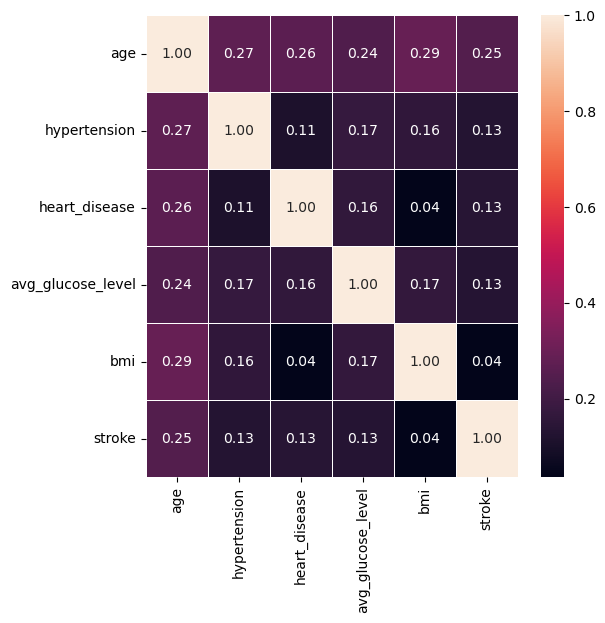

In [13]:
plt.figure(figsize=(6,6))
sns.heatmap(df_derrame.corr(),annot=True,linewidth=0.5, fmt='0.2f')
plt.show()

No se observa una correlación significativa entre las variables independientes

### Storytelling:

Es una técnica de visualización de datos que combina el análisis de datos con la narración de historias, con el objetivo de comunicar de manera efectiva la información. 

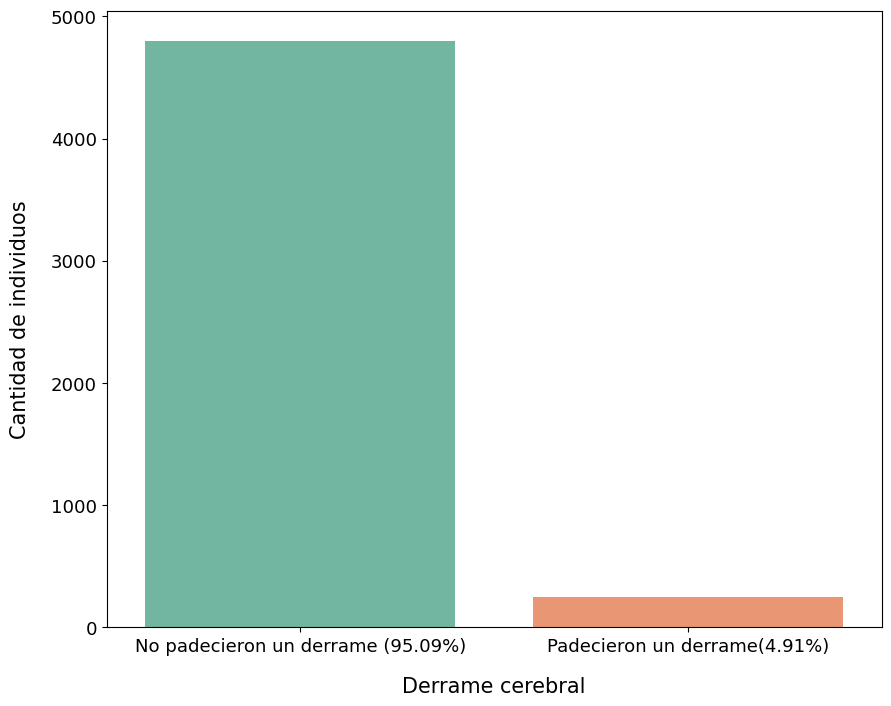

En sintesís:

248 de 5049 tuvo un derrame cerebral, es decir un 4.91%
4801 de 5049 no tuvo un derrame cerebral, es decir un 95.09%


In [14]:
derrame = df_derrame['stroke'].value_counts(normalize=False, sort=True, ascending=False, bins=None)[1]
sin_derrame = df_derrame['stroke'].value_counts(normalize=False, sort=True, ascending=False, bins=None)[0]

porcentaje_derrame = (derrame / df_derrame.shape[0] * 100)
porcentaje_sin_derrame = (sin_derrame / df_derrame.shape[0] * 100)

plt.figure(figsize=(10, 8))
sns.countplot(x='stroke', data=df_derrame, palette = "Set2")

plt.xlabel('Derrame cerebral', size=15, labelpad=15)
plt.ylabel('Cantidad de individuos', size=15, labelpad=15)
plt.xticks((0, 1), ['No padecieron un derrame ({0:.2f}%)'.format(porcentaje_sin_derrame), 'Padecieron un derrame({0:.2f}%)'.format(porcentaje_derrame)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.show()

print ("En sintesís:")
print ("")
print('{} de {} tuvo un derrame cerebral, es decir un {:.2f}%'.format(derrame, df_derrame.shape[0], porcentaje_derrame))
print('{} de {} no tuvo un derrame cerebral, es decir un {:.2f}%'.format(sin_derrame, df_derrame.shape[0], porcentaje_sin_derrame))


Se puede observar que aproximadamente **5 personas de cada 100** sufren de **accidentes cerebrovasculares** según nuestros datos de muestra. Además, esta es una distribución de datos altamente desequilibrada. Por lo tanto, al modelar y entrenar los datos, se hará un sobre-muestreo o sub-muestreo para obtener mejores resultados. 

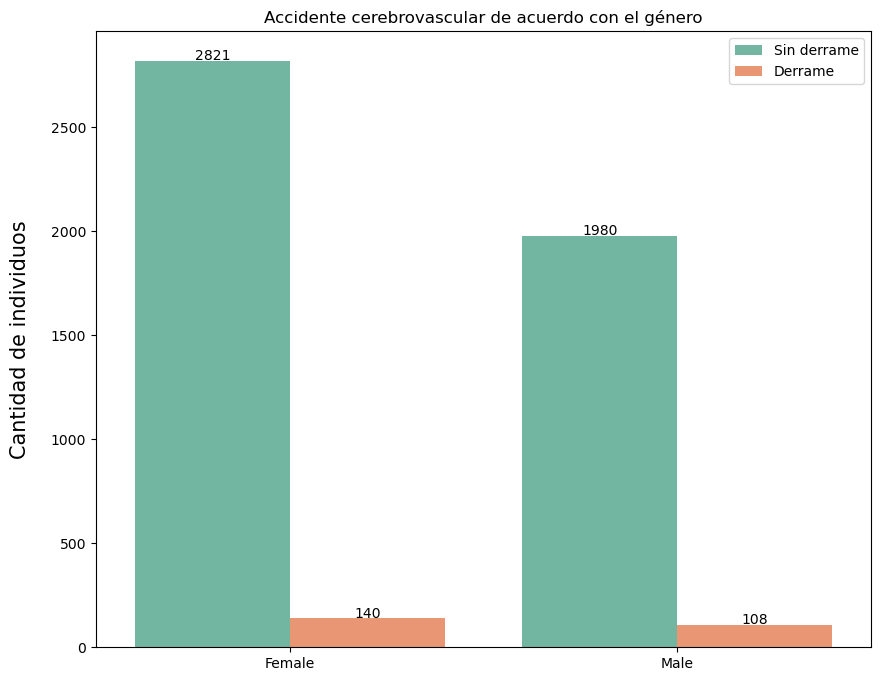

In [15]:
plt.figure(figsize = (10, 8))
sns.countplot(data= df_derrame, x="gender", hue="stroke",
              palette = "Set2");

plt.xlabel('', size=15, labelpad=15)
plt.ylabel('Cantidad de individuos', size=15, labelpad=15)
plt.legend(['Sin derrame','Derrame'],loc='upper right', prop={'size': 10})

plt.title("Accidente cerebrovascular de acuerdo con el género")
ax = plt.gca()
for patch in ax.patches:
    if patch.get_height() > 0:
        ax.text(patch.get_x() + patch.get_width()/2, 
                patch.get_height() + 3, '{:1.0f}'.format(patch.get_height()), 
                ha="center")


| Género | Padecieron un derrame | No han tenido un derrame |
|-|----------|----------|
| **Masculino** | 108 | 1980 |
| **Femenino** | 140 |2821|


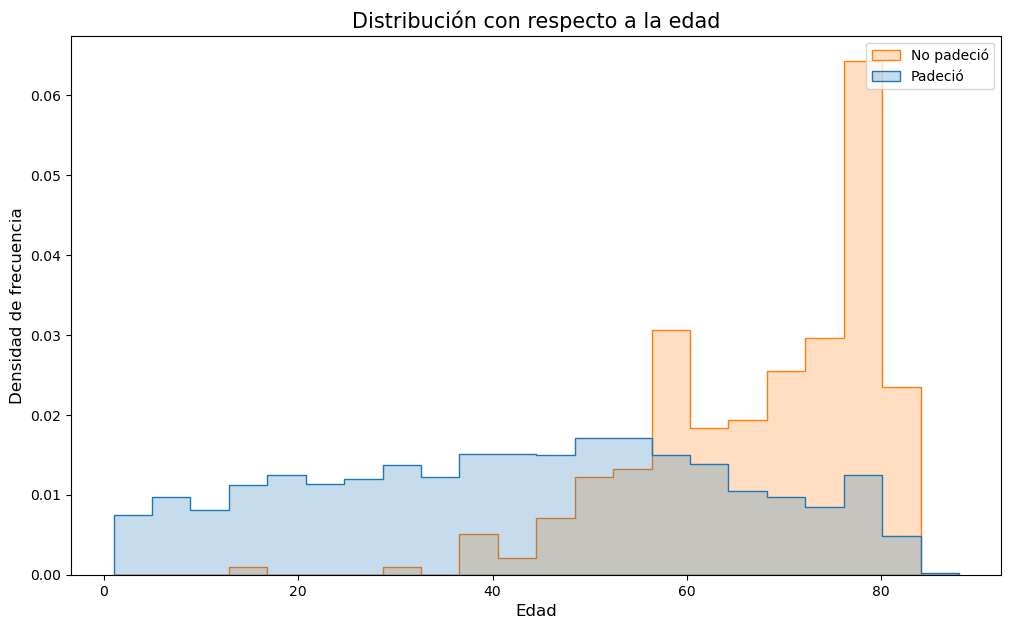

In [16]:
plt.figure(figsize=(12,7))
sns.histplot(
    df_derrame, x="age", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Distribución con respecto a la edad', fontsize=15)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Densidad de frecuencia', fontsize=12)
plt.legend(['No padeció','Padeció'],loc='upper right', prop={'size': 10})
plt.show()

La **edad** parece ser un **factor clave** cuando se trata de accidentes cerebrovasculares. Los datos muestran que a medida que las personas envejecen, aumenta el porcentaje de personas que han sufrido un derrame cerebral. 

Esto respalda nuestra premisa inicial de que la edad es un factor importante en el riesgo de accidente cerebrovascular. En particular, parece que las personas de **50 años o mayores tienen un riesgo más alto de sufrir un accidente cerebrovascular**. Es importante tener en cuenta estos hallazgos al considerar la prevención y el tratamiento de los accidentes cerebrovasculares, especialmente en poblaciones mayores.


In [18]:
df_derrame_2 = df_derrame.copy()

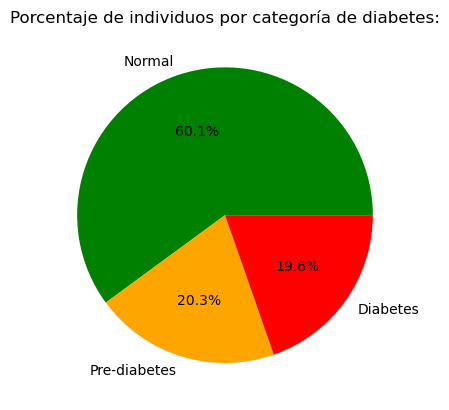

Cantidad de individuos con nivel promedio de glucosa normal:  3033

Cantidad de individuos con pre-diabetes:  1024

Cantidad de individuos con diabetes:  992


In [19]:
df_derrame_2['Categoría diabetes'] = pd.cut(df_derrame['avg_glucose_level'], 
                               bins=[0, 99, 125, 300], 
                               labels=['Normal', 'Pre-diabetes', 'Diabetes'])

d = df_derrame_2.groupby('Categoría diabetes')['avg_glucose_level'].size()/len(df_derrame)*100

colores = ['green', 'orange', 'red']
plt.pie(d, labels=d.index, autopct='%1.1f%%', colors=colores)
plt.title('Porcentaje de individuos por categoría de diabetes:')
plt.show()

print("Cantidad de individuos con nivel promedio de glucosa normal: ", (df_derrame_2['Categoría diabetes'] == 'Normal').sum())
print ("")
print("Cantidad de individuos con pre-diabetes: ", (df_derrame_2['Categoría diabetes'] == 'Pre-diabetes').sum())
print ("")
print("Cantidad de individuos con diabetes: ", (df_derrame_2['Categoría diabetes'] == 'Diabetes').sum())

| Categoría diabetes | Padecieron un derrame | No han tenido un derrame | Total |
|-|----------|----------| |
| **Normal** | 110 | 2923 | 3033|
| **Pre-diabetes** | 38 |986 | 1024|
| **Diabetes** | 100 |892|992|
|              |     |  |   |
| **Muestra** | 248 |4801|5049|

Los datos de nuestro estudio muestran que hay una **correlación entre la diabetes y los accidentes cerebrovasculares**.

Los **individuos con diabetes tienen un riesgo mucho mayor** de sufrir un accidente cerebrovascular que aquellos que no tienen diabetes. Es importante tener esto en cuenta y **tomar medidas preventivas para controlar la diabetes y reducir el riesgo**.

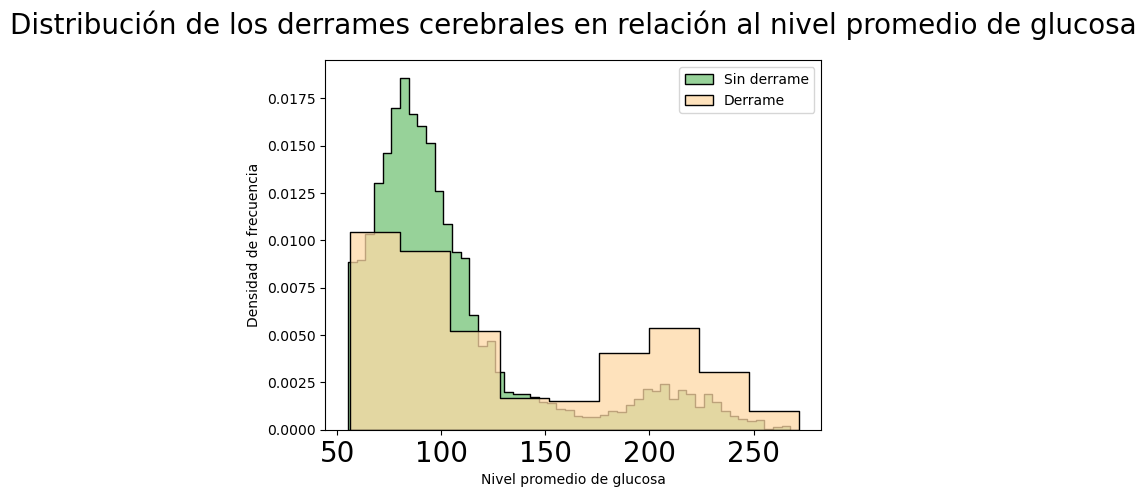

In [20]:
stroke = df_derrame['stroke'] == 1

sns.histplot(data=df_derrame[~stroke], x='avg_glucose_level', 
             hue='stroke', multiple='stack', element='step', 
             stat='density', common_norm=False, 
             kde_kws={'label': 'Not Stroke'}, palette = 'Greens_r')

sns.histplot(data=df_derrame[stroke], x='avg_glucose_level', 
             hue='stroke', multiple='stack', element='step', 
             stat='density', common_norm=False, 
             kde_kws={'label': 'Stroke'}, palette = 'Pastel1_r')

plt.xlabel('Nivel promedio de glucosa')
plt.ylabel('Densidad de frecuencia')
plt.tick_params(axis='x', labelsize=20)
plt.legend(['Sin derrame','Derrame'],loc='upper right', prop={'size': 10})
plt.title('Distribución de los derrames cerebrales en relación al nivel promedio de glucosa', 
          size=20, y=1.05)

plt.show()

Al analizar los datos de nuestro estudio, encontramos que **a medida que aumenta el nivel promedio de glucosa, aumenta también el registro de individuos que han sufrido un derrame cerebral**, en comparación con aquellos que no lo han padecido. Esto significa que la glucosa en la sangre puede ser un factor importante en el riesgo de accidente cerebrovascular.

Es importante recordar que **controlar la glucosa en la sangre es crucial** para prevenir enfermedades crónicas como la diabetes, y ahora también sabemos que puede ayudar a reducir el riesgo de accidente cerebrovascular.

<center> <h3> Categorías básicas - Índice de masa corporal </h3> </center>

| Categoría | BMI (kg/m^2)| 
|----------|----------| 
| Bajo peso (delgadez severa) | < 16.0 | 
| Bajo peso (delgadez moderada)| 16.0 – 16.9|
| Bajo peso (delgadez leve)| 17.0 – 18.4 | 
| Rango normal | 18.5 – 24.9 | 
| Sobrepeso (pre-obesidad) | 	25.0 – 29.9 | 
| Obesidad (clase I)| 30.0 – 34.9 | 
| Obesidad (clase II)| 35.0 – 39.9 | 
| Obesidad (clase III)| ≥ 40.0 | 

<br>
<center> Fuente: https://en.wikipedia.org/wiki/Body_mass_index </center>


In [21]:
#Añadimos una nueva colunna que referencia a las clasifiaciones posibles de
#acuerdo con el BMI
def clasificacion (bmi):
    if bmi < 16.0:
        return "Bajo peso (delgadez severa)"
    elif bmi >= 16.0 and bmi <= 16.9:
        return "Bajo peso (delgadez moderada)"
    elif bmi >= 17.0 and bmi <= 18.4:
        return "Bajo peso (delgadez leve)"
    elif bmi >= 18.5 and bmi <= 24.9:
        return "Rango normal"
    elif bmi >= 25.0 and bmi <= 29.9:
        return "Sobrepeso (pre-obesidad)"
    elif bmi >= 30.0 and bmi <= 34.9:
        return "Obesidad (clase I)"
    elif bmi >= 35.0 and bmi <= 39.9:
        return "Obesidad (clase II)"
    else:
        return "Obesidad (clase III)"

df_derrame_2["Clasificación BMI"] = df_derrame_2["bmi"].apply(clasificacion)

contador = df_derrame_2["Clasificación BMI"].value_counts()
contador_dicc = contador.to_dict()

for i, j in contador_dicc.items():
    print("La categoría", i , "tiene", j, "personas")


La categoría Sobrepeso (pre-obesidad) tiene 1606 personas
La categoría Rango normal tiene 1206 personas
La categoría Obesidad (clase I) tiene 1000 personas
La categoría Obesidad (clase II) tiene 506 personas
La categoría Obesidad (clase III) tiene 414 personas
La categoría Bajo peso (delgadez leve) tiene 158 personas
La categoría Bajo peso (delgadez moderada) tiene 81 personas
La categoría Bajo peso (delgadez severa) tiene 78 personas


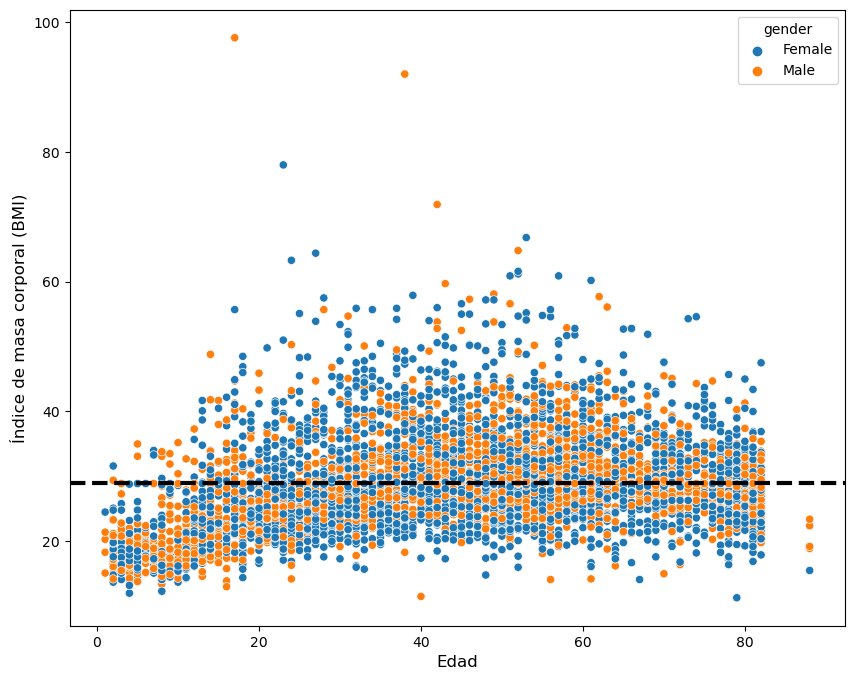

In [22]:
plt.figure(figsize=(10,8))
fig = sns.scatterplot(data=df_derrame, x="age", y="bmi", hue='gender')
fig.axhline(y= df_derrame['bmi'].mean(), 
            linewidth= 3, color='k', linestyle= '--')
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Índice de masa corporal (BMI)', fontsize=12)
plt.show()

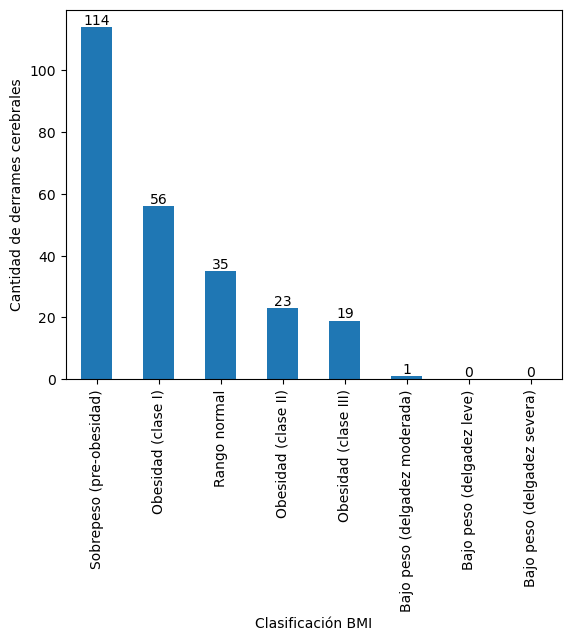

In [23]:
df_derrame_bmi = df_derrame_2.groupby("Clasificación BMI")["stroke"].sum()

df_derrame_bmi = df_derrame_bmi.sort_values(ascending=False)
ax = df_derrame_bmi.plot(kind='bar', xlabel='Clasificación BMI', ylabel='Cantidad de derrames cerebrales')
for i in ax.containers:
    ax.bar_label(i,)


plt.show()

In [24]:
df_auxiliar_bmi = pd.DataFrame(columns=["Cantidad de personas por categoría", "Cantidad que padeció un derrame cerebral"])

df_contador = df_derrame_2.groupby("Clasificación BMI").size().reset_index(name='Cantidad de personas por categoría')
df_derrame_aux = df_derrame_2.groupby("Clasificación BMI")["stroke"].sum().reset_index(name='Cantidad que padeció un derrame cerebral')


df_auxiliar_bmi = pd.merge(df_contador, df_derrame_aux, on='Clasificación BMI')
df_auxiliar_bmi ["Porcentaje de ocurrencia de un derrame según BMI"] = df_auxiliar_bmi["Cantidad que padeció un derrame cerebral"] / df_auxiliar_bmi["Cantidad de personas por categoría"] * 100

df_auxiliar_bmi = df_auxiliar_bmi.set_index("Clasificación BMI")
df_auxiliar_bmi = df_auxiliar_bmi.sort_values(by=["Porcentaje de ocurrencia de un derrame según BMI"], ascending=False)
df_auxiliar_bmi["Porcentaje de ocurrencia de un derrame según BMI"] = df_auxiliar_bmi["Porcentaje de ocurrencia de un derrame según BMI"].apply(lambda x: "{:.2f}%".format(x))

df_auxiliar_bmi

,Cantidad de personas por categoría,Cantidad que padeció un derrame cerebral,Porcentaje de ocurrencia de un derrame según BMI
Clasificación BMI,,,
Sobrepeso (pre-obesidad),1606,114,7.10%
Obesidad (clase I),1000,56,5.60%
Obesidad (clase III),414,19,4.59%
Obesidad (clase II),506,23,4.55%
Rango normal,1206,35,2.90%
Bajo peso (delgadez moderada),81,1,1.23%
Bajo peso (delgadez leve),158,0,0.00%
Bajo peso (delgadez severa),78,0,0.00%


Se demuestra que hay una **correlación entre el índice de masa corporal y los riesgos de un derrame cerebral**. Para validar nuestro supuesto, analizamos los datos de nuestro estudio en un gráfico y en una tabla.

Se puede observar que a medida que aumenta el índice de masa corporal, aumenta también el porcentaje de personas que han sufrido un derrame cerebral. **Es importante tener en cuenta este factor y trabajar en estrategias para mantener un BMI saludable, como una dieta equilibrada y ejercicio regular.**

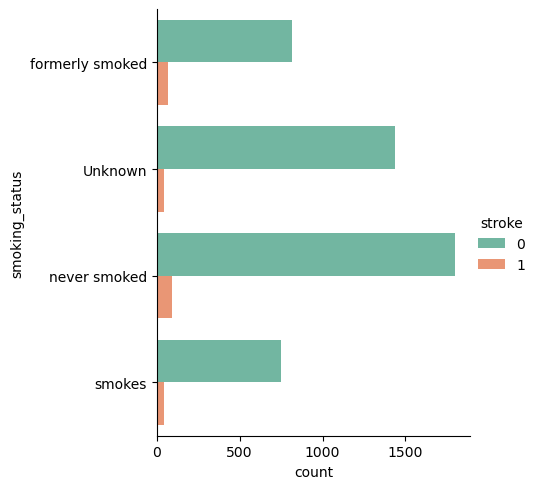

In [25]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="Set2", data=df_derrame)

| Status del fumador | Padecieron un derrame | No padecieron derrame |
|-|----------|----------|
| Nunca fumó | 90 | 1802 |
| Desconocido | 46 | 1438 | 
| Ex-fumador | 70 | 814 |
| Fumador | 42 | 747| 


Sorprendentemente, **el hábito de fumar no está altamente correlacionado con el riesgo de sufrir un derrame cerebral**. Esto se puede observar en el gráfico, que muestra la distribución de individuos que han sufrido un derrame cerebral en comparación con su status de fumador.

Aunque el número de fumadores que han sufrido un derrame cerebral es ligeramente mayor que el de no fumadores, **la distribución es bastante similar.**

Sin embargo, **esto no significa que el hábito de fumar sea inofensivo.** Sabemos que fumar aumenta el riesgo de enfermedades cardiovasculares, cáncer y otros problemas de salud, **por lo que siempre se recomienda dejar de fumar para mejorar la salud general.**

---

A continuación, aplicaré la técnica **"Label Encoding"** con el fin de convertir datos categóricos en valores numéricos. La misma consiste en asignar un valor numérico a c/una de las categorías de una variable categórica, de tal forma que cada categoría se convierte en un número distinto. 

**Las variables categóricas del DataFrame con el cuál se trabaja son:**

* Género (correspondiente a la columna "gender")
* Contrajo matrimonio (correspondiente a la columna "ever_married")
* Tipo de trabajo (correspondiente a la columna "work_type")
* Tipo de residencia (correspondiente a la columna "Residence_type")
* Categoría de fumador (correspondiente a la columna "smoking_status")


In [27]:
le = LabelEncoder()
for column in df_derrame.columns:
    if df_derrame[column].dtype == 'object':
        df_derrame[column] = le.fit_transform(df_derrame[column].astype(str))


df_derrame.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
67,0,17,0,0,0,2,1,92.97,28.893237,1,0
77,0,13,0,0,0,4,0,85.81,18.600000,0,0
84,1,55,0,0,1,2,1,89.17,31.500000,2,0
91,0,42,0,0,0,2,1,98.53,18.500000,2,0
99,0,31,0,0,0,2,1,108.89,52.300000,0,0


### Separación matriz diseño y vector respuesta:

A continuación, extraemos "X" e "y". 
* "X": es la matriz de características, que contiene los valores de todas las características para cada muestra.

<br>

* "y": es el vector objetivo, en este caso, corresponde a la columna "stroke"

In [28]:
X = df_derrame.drop('stroke', axis=1)
y = df_derrame['stroke']

A continuación, aplicaremos un **método de selección de características para reducir la dimensionalidad** del conjunto de datos.

Emplearemos el **método de prueba chi-cuadrado.**

In [29]:
selector = SelectKBest(chi2, k=3)
X_new = selector.fit_transform(X, y)

### Aplicamos la técnica de sobremuestro SMOTE

Al tener un conjunto de datos en el que el 95,09% de las observaciones pertenece a la clase negativa (no ha padecido un derrame cerebral) y el 4,91% restante pertenece a la clase positiva, podemos decir que el conjunto de datos está desequilibrado y que la clase positiva es la clase minoritaria. 

Es por ello, que emplearemos la técnica de sobremuestreo SMOTE para abordar el desequilibrio de clases y mejorar la capacidad del modelo para detectar patrones en la clase minoritaria.

Se crearan nuevas observaciones sintéticas para la clase minoritaria a partir de las observaciones existentes, de forma que el conjunto de datos esté más balanceado y las clases tengan una cantidad de observaciones similares. 

Y es por esto que logré mejorar la capacidad del modelo de clasificación para detectar patrones en la clase positiva (la minoritaria) y aumentar tanto su precisión como recall. 

In [30]:
oversample = SMOTE(random_state=42)
X_new, y = oversample.fit_resample(X_new, y)

### Train/Test: Dividimos el conjunto de datos.
* De entrenamiento 
* De prueba

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X_new , y ,test_size = 0.20 , random_state = 42)


**test_size:** indica el tamaño del conjunto de datos de prueba. En este caso, se utilizó el valor 0.2, lo que significa que el 20% del conjunto de datos se utilizará como conjunto de prueba y el 80% restante se utiliza como conjunto de entrenamiento. 
Se corrobora a continuación con un shape: 

### Modelo de clasificación basado en árboles de decisión:

Un árbol de decisión es un modelo de clasificación que toma decisiones basadas en una serie de preguntas o condiciones que se aplican a los datos de entrada. 

Se construye a partir de un conjunto de datos de entrenamiento definidos anteriormente y se utiliza para clasificar nuevas observaciones en función de características. 

Una vez elaborado, lo utilizaremos para hacer predicciones sobre los datos de prueba. 


In [32]:
arbol_decision = DecisionTreeClassifier(random_state=42)
arbol_decision.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

A continuación, haremos las predicciones sobre el conjunto de prueba utilizando el modelo de clasificación entrenado.
Además, calcularemos varias métricas de evaluación para medir el rendimiento del modelo seleccionado y poder validarlo.

In [33]:
y_pred = arbol_decision.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Exactitud: 0.9307652264445602
Precisión: 0.9213836477987422
Recall: 0.9381003201707577
F1-score: 0.9296668429402433
Matriz de confusión:
 [[909  75]
 [ 58 879]]


### Conclusiones:


* La **precisión** del modelo es del **92,14%**, lo que significa que de todas las predicciones positivas que hizo, el porcentaje mencionado fueron correctas.
* El **recall** del modelo es del **93,81%** lo que significa que el modelo identificó correctamente el 93,81%% de los casos positivos. 
* El **F1-score** es del **92,97%** lo que representa un equilibrio entre la precisión y el recall del modelo. 
* El **modelo clasificó correctamente el 93,08%** de todas las instancias en el conjunto de prueba. En particular, y a partir de la **matriz de confusión**, podemos estar seguros de que el modelo identificó correctamente 909 casos negativos (no ha padecido derrame) y 879 casos positivos (padeció un derrame), mientras que se equivocó en 58 casos positivos y 75 casos negativos. 
* **No parece haber una situación de sobreajuste o subajuste basándonos en las métricas generadas.**

### Comparando modelos ML.

In [34]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


A continuación, para reducir la dimensionalidad del dataset lo haremos a través de la **selección de características utilizando la prueba de importancia de características** y se entrena un **modelo Random Forest.** 

In [35]:
X = df_derrame.drop('stroke', axis=1)
y = df_derrame['stroke']

# Selección de características utilizando prueba de importancia de características
selector = SelectFromModel(RandomForestClassifier(random_state=42))
X_new = selector.fit_transform(X, y)

# Aplicación de SMOTE sobre el conjunto de datos reducido
oversample = SMOTE(random_state=42)
X_new, y = oversample.fit_resample(X_new, y)

# División en conjunto de entrenamiento y prueba
X_train , X_test , y_train , y_test = train_test_split(X_new , y ,test_size = 0.20 , random_state = 42)

# Entrenamiento del modelo
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Predicción y evaluación del modelo
y_pred = random_forest.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Exactitud: 0.9177511712649662
Precisión: 0.8822374877330716
Recall: 0.959445037353255
F1-score: 0.9192229038854806
Matriz de confusión:
 [[864 120]
 [ 38 899]]


En términos generales, ambos modelos obtuvieron resultados similares.
En el caso en que aplicamos el método de prueba chi-cuadrado para reducir la dimensionalidad del dataset y optamos por el modelo de clasificación basado en árboles de decisión, se logró una exactitud, precisión y F1-score ligeramente mejor que en este último caso. 

En términos de la matriz de confusión, el primer modelo tuvo menos falsos positivos y este último, tuvo menos falsos negativos.


Para identificar si se tiene una **situación de overfitting o underfitting**, es importante analizar las métricas generadas. En este caso, la precisión, recall y F1-score son relativamente altas, lo que indica que el modelo está realizando una buena tarea en la clasificación de los datos. 

Sin embargo, como la métrica exactitud es un poco más baja que las otras, podría indicar una posible situación de overfitting.
La matriz de confusión muestra que hay un desequilibrio en las clases, con menos casos positivos que negativos. 

Otra forma de control, es dividir los datos en conjuntos de entrenamiento y prueba y evaluar el rendimiento del modelo en ambos conjuntos. 
* Si el modelo tiene un rendimiento mucho mejor en el conjunto de entrenamiento que en el de prueba, entonces se puede concluir que el modelo sobreajuste los datos de entrenamiento y se necesita una mejor generalización.

---

En las siguientes líneas de código, reducimos la dimensionalidad del dataset a través de **PCA** y se entrena con el **modelo de clasificación basado en árboles de decisión**. 

In [36]:
X = df_derrame.drop('stroke', axis=1)
y = df_derrame['stroke']

# Reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=3)
X_new = pca.fit_transform(X)

# Aplicación de SMOTE sobre el conjunto de datos reducido
oversample = SMOTE(random_state=42)
X_new, y = oversample.fit_resample(X_new, y)

# División en conjunto de entrenamiento y prueba
X_train , X_test , y_train , y_test = train_test_split(X_new , y ,test_size = 0.20 , random_state = 42)

# Entrenamiento del modelo
arbol_decision = DecisionTreeClassifier(random_state=42)
arbol_decision.fit(X_train, y_train)

# Predicción y evaluación del modelo
y_pred = arbol_decision.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Exactitud: 0.8740239458615304
Precisión: 0.8571428571428571
Recall: 0.8900747065101388
F1-score: 0.8732984293193717
Matriz de confusión:
 [[845 139]
 [103 834]]


El modelo propuesto en la entrega parece tener un mejor desempeño que este alternativo. La exactitud, precisión, recall y F1-score son más altos que en este último. Además, la matriz de confusión del modelo inicial muestra menos falsos negativos y falsos positivos en comparación a la segunda alternativa. 

**La segunda alternativa en principio, da peores resultados a los dos modelos anteriores.**

**En cuanto a la posible situación de overfitting o underfitting, no podemos determinarlo solo con las métricas generadas. Habría que aplicar la otra forma mencionada previamente.**

### A futuro: 


Las siguientes opciones a implementar podrían lograr una mejora en el modelo:

* Probar con diferentes modelos de clasificación y comparar sus resultados para determinar cuál funciona mejor para el DataSet. 

<br>

* Realizar una selección de características para determinar cuáles son las variables más importantes para el modelo, y utilizar únicamente estas variables en el modelo final.